# Signal processing

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


Signal processing is a field of engineering and applied mathematics that focuses on analyzing, modifying, and synthesizing signals. A signal can be anything that conveys information, such as sound, images, or sensor readings. The primary goal of signal processing is to extract useful information from signals or transform them to make them more efficient for storage, transmission, or further analysis. This can involve filtering out noise, compressing data, enhancing features, or transforming signals into a different domain (e.g., from time to frequency).

<br>

___

<br>

## Reading trends from stock prices

In this problem, you will analyze the trend of Samsung Electronics' stock prices over the past 10 years. The following cell downloads this data and saves it in the `samsung` dataframe.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta

samsung = yf.download('005930.KS', start=date.today()-timedelta(10*365))
y = samsung['Close'].values

samsung

/var/folders/ww/99v1qpcs4l16gwsgl9c7j_cm0000gn/T/ipykernel_25859/83032993.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  samsung = yf.download('005930.KS', start=date.today()-timedelta(10*365))
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2015-10-26,20078.425781,20171.669245,19767.614237,20171.669245,7608250
2015-10-27,20171.666016,20187.206590,19907.476245,19923.016820,6612050
2015-10-28,20327.072266,20327.072266,20062.882488,20109.504214,13565150
2015-10-29,20591.263672,21632.482288,20575.723096,20668.966554,31523550
2015-10-30,21321.664062,21601.394349,20839.906347,20902.068633,25469250
...,...,...,...,...,...
2025-10-16,97700.000000,97700.000000,95000.000000,95300.000000,28141060
2025-10-17,97900.000000,99100.000000,96700.000000,97200.000000,22730809


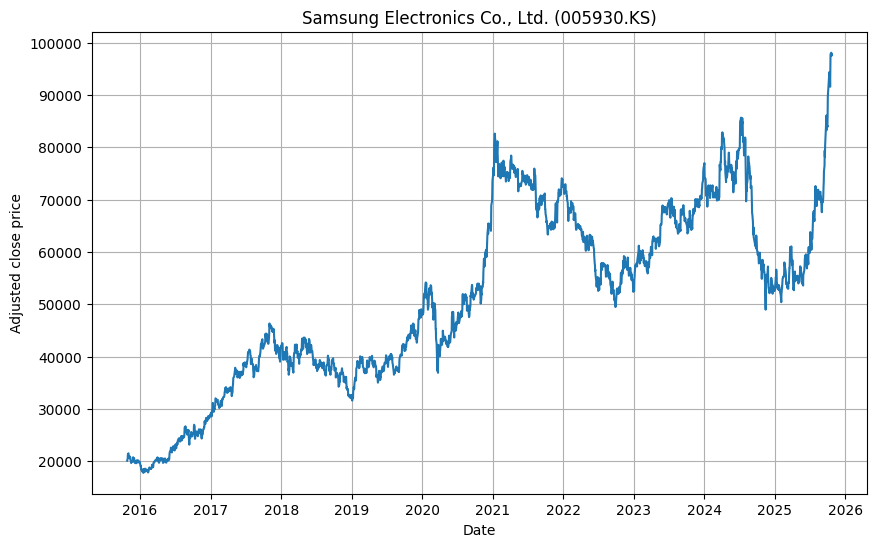

In [2]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(samsung.index, y)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.title('Samsung Electronics Co., Ltd. (005930.KS)')
plt.show()

<br>

### Moving average filter

A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filter.

Given a series of numbers ($y_1,\dots,y_N$) and a fixed subset size $n$, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

We implement a simple moving average $x_t$ of the given signal $y_t$ with window size $n$ as follows:

$$
  x_t =
  \begin{cases}
  \left( y_t + \cdots + y_{1}\right)/t &\quad \text{if } t\le n,\\
  \left( y_t + y_{t-1} + \cdots + y_{t-n+1}\right)/n &\quad \text{otherwise.}
  \end{cases}
$$

<br>

Various moving average filters for $n=7, 30, 90, 180$ are presented below. What do you observe?

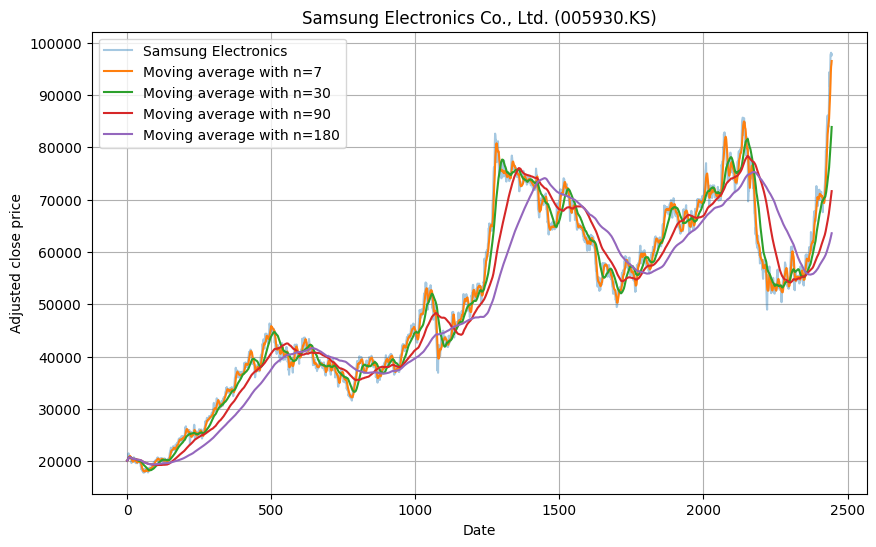

In [3]:
N = len(y)

window = [7, 30, 90, 180]

k = len(window)

x = np.zeros((k,N))

for i in range(k):
  n = window[i]
  for j in range(N):
    start = max(0,j-n+1)
    data = y[start:j+1]
    n_data = len(data)
    #print(start, j, n_data, data)
    x[i,j] = np.sum(data)/n_data

plt.figure(figsize=(10,6), dpi=100)
plt.plot(y, alpha=0.4, label='Samsung Electronics')
for i in range(k):
  plt.plot(x[i,:], label=f'Moving average with n={window[i]}')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.title('Samsung Electronics Co., Ltd. (005930.KS)')
plt.legend()
plt.show()

<br>

___

<br>

## Gravity anomaly interpolation

We have gravity measurements taken at scattered locations on the Earth's surface, and we want to estimate the gravity values at other locations where measurements were not taken.

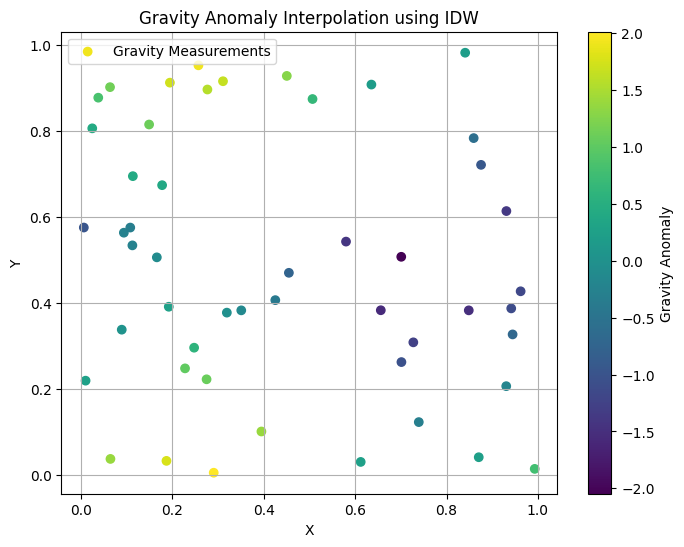

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample gravity data
num_points = 50
np.random.seed(3001)
x = np.random.rand(num_points)
y = np.random.rand(num_points)
gravity_values = np.sin(2*np.pi*x) + np.cos(2*np.pi*y) \
  + np.random.randn(num_points)*0.1

# Plot the results
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(x, y, c=gravity_values, label='Gravity Measurements')
plt.colorbar(label='Gravity Anomaly')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gravity Anomaly Interpolation using IDW')
plt.legend()
plt.grid()
plt.show()

<br>

### Inverse distance weighting (IDW)

We'll use Inverse Distance Weighting (IDW) interpolation for estimating the gravity at the locations where the measurements were not taken.

IDW interpolation is a simple and widely used method for estimating values at unsampled locations based on nearby measurements. It assumes that the value at an unsampled location is a weighted average of the values at nearby measurement locations, where the weights are inversely proportional to the distance from the measurement locations.



<br>

Let's denote:

- $u(x)$ : The value to be estimated at an unsampled location $x$.
- $u_i$ : The measured value at location $x_i$.
- $d_i$ : The distance between the unsampled location $x$ and the measurement location $x_i$.
- $w_i$ : The weight assigned to the measurement at location $x_i$.
- $p$ : A power parameter that controls the influence of distance on the weights.

<br>
Then the IDW interpolation formula is given by:

$$
  u(x) = \frac{\sum_i{w_i u_i}}{\sum_i {w_i}}
$$

where the weights $w_i$ are calculated as:

$$
  w_i = 1/d_i^p
$$

<br>

The power parameter $p$ typically takes a value of 2, but it can be adjusted to control the influence of distance on the weights. A higher value of $p$ gives more weight to closer measurements, while a lower value of $p$ gives more weight to distant measurements.

The distance $d_i$ between the unsampled location $x$ and the measurement location $x_i$ can be calculated using various distance metrics, such as:

- Euclidean distance (2-norm): $d_i = \sqrt{(x - x_i)^2 + (y - y_i)^2}$
- Manhattan distance (1-norm): $d_i = |x - x_i| + |y - y_i|$

The choice of distance metric depends on the specific application and the nature of the data.

<br>

The following shows the results obtained using the Euclidean distance with $p=2$.

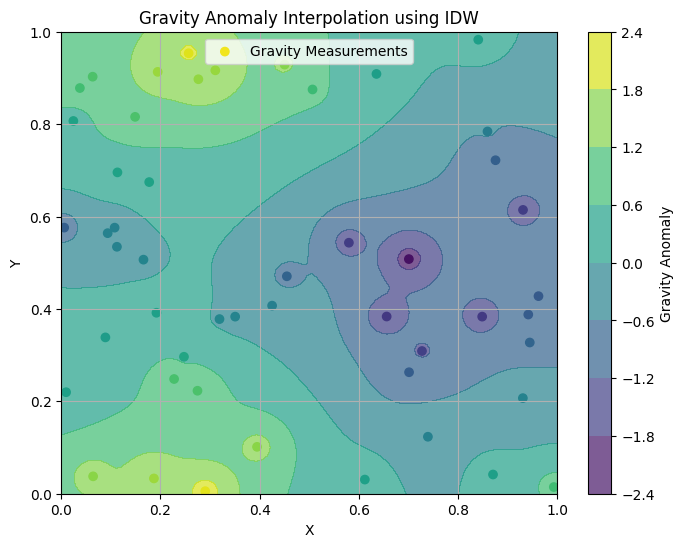

In [5]:
# Define the interpolation grid
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]

# Perform IDW interpolation
interpolated_gravity = np.zeros_like(grid_x)
for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        distances = np.sqrt((grid_x[i, j] - x)**2 + (grid_y[i, j] - y)**2)
        weights = 1 / distances**2  # Inverse distance squared weighting
        interpolated_gravity[i, j] = np.sum(gravity_values * weights) / np.sum(weights)
        #interpolated_gravity[i, j] = np.sin(2*np.pi*grid_x[i,j]) + np.cos(2*np.pi*grid_y[i,j])

# Plot the results
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(x, y, c=gravity_values, label='Gravity Measurements')
plt.contourf(grid_x, grid_y, interpolated_gravity, alpha=0.7)
plt.colorbar(label='Gravity Anomaly')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gravity Anomaly Interpolation using IDW')
plt.legend()
plt.grid()
plt.show()

* * *

## System Identification of an Aerospace System using Regularized Least Squares

System identification is the process of building a mathematical model of a dynamic system from observed input and output data. In aerospace, this is crucial for understanding the behavior of aircraft, spacecraft, or their components, which in turn is essential for control system design, performance analysis, and fault detection.

Often, we can model the relationship between the input and output of a system as a convolution with the system's impulse response. Given a measured input signal $u(t)$ and a measured output signal $y(t)$, both of which may be corrupted by noise, we want to find the system's impulse response $h(t)$ such that:

$$y(t) \approx (h * u)(t) + \text{noise}$$

In a discrete-time setting, this convolution can be represented as a matrix multiplication. However, directly solving for the impulse response using standard least squares can lead to an ill-conditioned problem, especially when the data is noisy or the impulse response is long. This is where regularized least squares comes in. Regularization adds a penalty term to the least squares objective function, which helps to constrain the solution and make it more robust to noise.

Consider the problem of identifying the impulse response of a simplified aerospace component (e.g., an actuator or a sensor) from noisy input and output data.

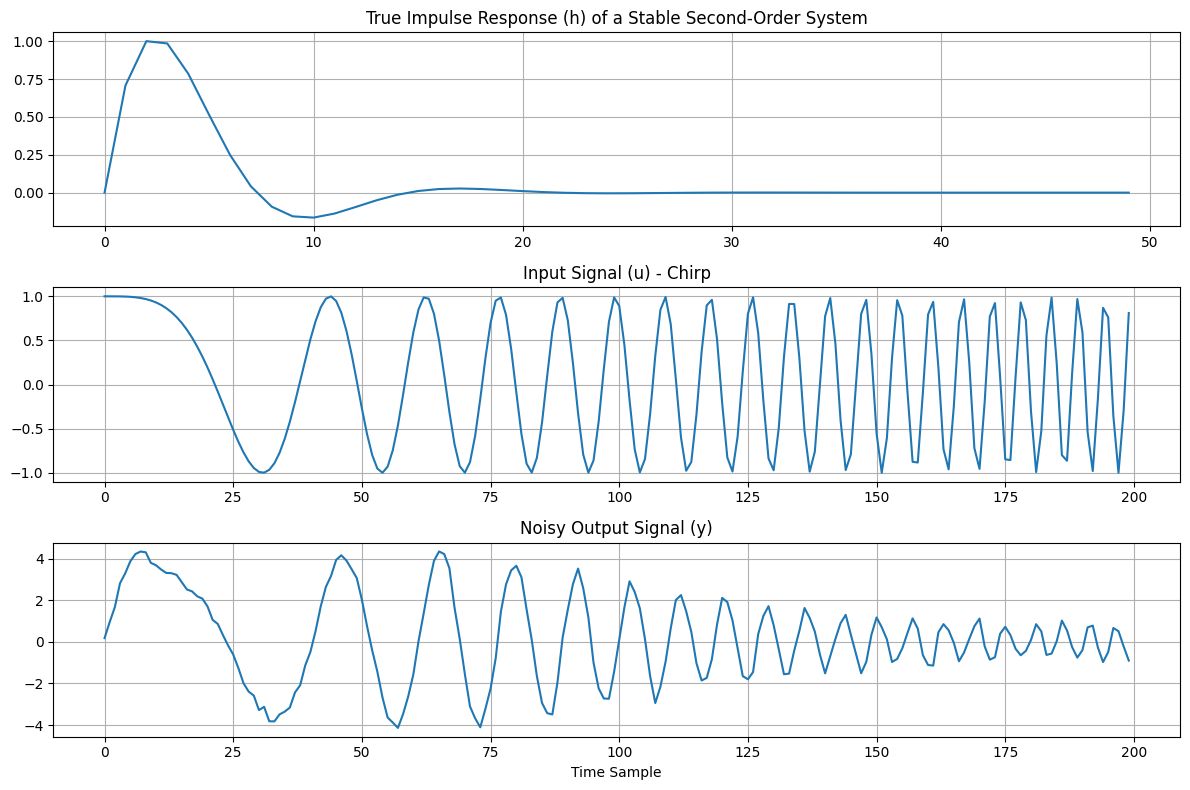

In [6]:
# Simulate input and output data for system identification

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, impulse, chirp

# --- Simulation parameters ---
N = 200  # Number of data points
M = 50   # Length of the true impulse response

# Generate a true impulse response from a stable second order system
# Example: A damped harmonic oscillator
# Transfer function: H(s) = omega_n^2 / (s^2 + 2*zeta*omega_n*s + omega_n^2)
# Convert to discrete time impulse response

# System parameters
omega_n = 5  # Natural frequency
zeta = 0.5     # Damping ratio (for stable system, 0 < zeta < 1)
dt = 0.1       # Time step

# Define the system's transfer function coefficients (numerator and denominator)
# Using a discrete-time representation
# For simplicity, let's define the impulse response directly for M points
# A common form for a damped discrete-time impulse response is exponential decay with oscillation
t = np.arange(M) * dt
true_h = np.exp(-zeta * omega_n * t) * np.sin(omega_n * np.sqrt(1 - zeta**2) * t)
true_h = true_h / np.max(np.abs(true_h)) # Normalize for reasonable amplitude


# Generate a chirp input signal
T = N * dt # Total time duration
f0 = 0.01 # Start frequency
f1 = 2 # End frequency
t_u = np.linspace(0, T, N, endpoint=False)
u = chirp(t_u, f0=f0, t1=T, f1=f1, method='linear')

# Simulate the true output (convolution of input and true impulse response)
true_y = convolve(u, true_h, mode='full')[:N]

# Add noise to the output
noise_level = 0.2
noisy_y = true_y + np.random.randn(N) * noise_level

# Plot the simulated data
plt.figure(figsize=(12, 8), dpi=100)

plt.subplot(3, 1, 1)
plt.plot(true_h)
plt.title('True Impulse Response (h) of a Stable Second-Order System')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(u)
plt.title('Input Signal (u) - Chirp')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(noisy_y)
plt.title('Noisy Output Signal (y)')
plt.xlabel('Time Sample')
plt.grid(True)

plt.tight_layout()
plt.show()

* * *

<br>

We first formulate the system identification problem as a linear equation
$$\mathbf{y} = \mathbf{U}\mathbf{h} + \mathbf{e},$$
where $\mathbf{y}$ is the noisy output vector, $\mathbf{h}$ is the impulse response vector we want to estimate, $\mathbf{e}$ is the noise vector, and $\mathbf{U}$ is a matrix constructed from the input signal $\mathbf{u}$. What is the structure of the matrix $\mathbf{U}$ (Hint: Toeplitz matrix)?



In [7]:
# Construct the U matrix
U = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        if i - j >= 0:
            U[i, j] = u[i - j]

<br>

We then implement the standard linear least squares solution to estimate the impulse response
$$\hat{\mathbf{h}}_{\text{LS}} = \left(\mathbf{U}^T \mathbf{U}\right)^{-1} \mathbf{U}^T \mathbf{y}.$$

Plot the estimated impulse response and compare it to the `true_h`. What do you observe?

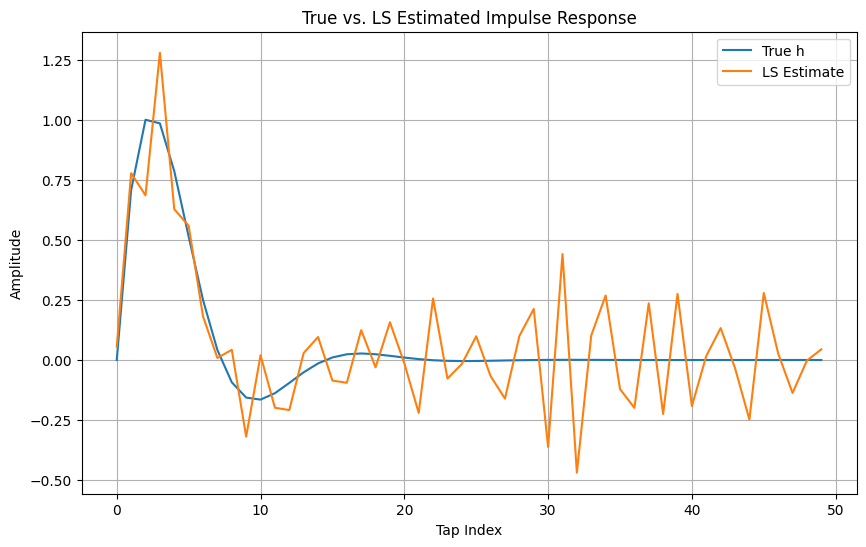

Standard Least Squares Estimate of h:
 [ 0.05543584  0.77771574  0.68551969  1.27899503  0.62772061  0.5584989
  0.18141629  0.00835858  0.04261647 -0.3189671   0.0198169  -0.19869798
 -0.20833017  0.02906372  0.0956437  -0.08554482 -0.09483884  0.1242106
 -0.03046035  0.15706952 -0.01368483 -0.22027327  0.25604511 -0.07734389
 -0.01667898  0.098716   -0.06701737 -0.16066134  0.0997318   0.21244522
 -0.36159802  0.44121082 -0.469184    0.10205775  0.26858955 -0.12100062
 -0.19925481  0.2358137  -0.22468285  0.27517634 -0.19176327  0.01685147
  0.13300516 -0.03363093 -0.24776181  0.27907678  0.02719325 -0.13723714
 -0.00237227  0.04436031]


In [8]:
# Standard linear least squares

hat_h_ls, residuals, rank, s = np.linalg.lstsq(U, noisy_y, rcond=None)

# Plot the estimated impulse response and compare to true_h
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(true_h, label='True h')
plt.plot(hat_h_ls, label='LS Estimate')
plt.title('True vs. LS Estimated Impulse Response')
plt.xlabel('Tap Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

print("Standard Least Squares Estimate of h:\n", hat_h_ls)

<br>

Now implement the Tikhonov regularized least squares solution:

$$\hat{\mathbf{h}}_{\text{Tikhonov}} = \left(\mathbf{U}^T \mathbf{U} + \lambda \mathbf{I}\right)^{-1} \mathbf{U}^T \mathbf{y},$$

where $\lambda$ is the regularization parameter and $\mathbf{I}$ is the identity matrix. Experiment with different values of $\lambda$. How does the estimated impulse response change as you vary $\lambda$?

Discuss the trade-off between fitting the data well and keeping the estimated impulse response "smooth" or "small" when using regularization. How does the choice of $\lambda$ relate to this trade-off?

Tikhonov Estimate of h (λ=0.1):
 [ 0.06926368  0.73171346  0.75845443  1.20702006  0.67553806  0.53267583
  0.18936834  0.01909625  0.01190586 -0.27100737 -0.02662918 -0.18602236
 -0.1863194   0.01787329  0.07607421 -0.07274365 -0.07786595  0.09800884
 -0.00401658  0.12997886 -0.01628464 -0.17041972  0.19537972 -0.04719491
 -0.01032061  0.07523291 -0.06283433 -0.13298841  0.08677373  0.16444665
 -0.26072771  0.31474916 -0.36025873  0.07333102  0.22325595 -0.09437567
 -0.16005917  0.16870824 -0.1570548   0.20511346 -0.14018023  0.01211432
  0.10787922 -0.03658692 -0.19139556  0.22111769  0.03351212 -0.11374495
 -0.01336497  0.04329922]
Tikhonov Estimate of h (λ=1):
 [ 0.09946818  0.63374516  0.90068335  1.07073602  0.75708191  0.48427866
  0.20362753  0.03989641 -0.04198281 -0.17964214 -0.12752167 -0.15949148
 -0.12115841 -0.01359272  0.01751479 -0.03868033 -0.0315725   0.04869735
  0.03652619  0.06393816 -0.00948313 -0.06057138  0.06794127  0.00589796
  0.00629781  0.01641554 -0.044699

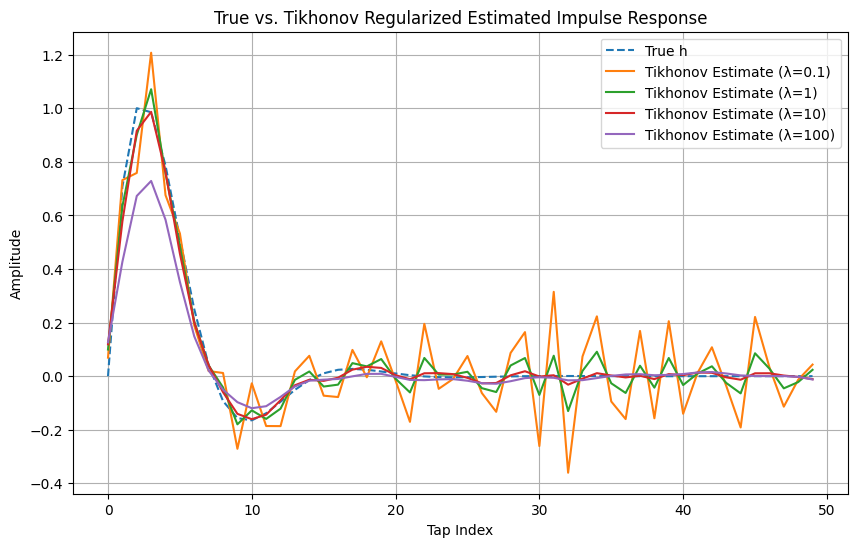

In [9]:
# Tikhonov regularized least squares

# Experiment with different lambda values
lambda_values = [0.1, 1, 10,100]

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(true_h, label='True h', linestyle='--')

for lambda_val in lambda_values:
    # Implement Tikhonov regularized least squares
    # hat_h_tikhonov = np.linalg.solve(U.T @ U + lambda_val * np.eye(M), U.T @ noisy_y)
    # Using np.linalg.solve is generally more robust for explicit Tikhonov
    hat_h_tikhonov = np.linalg.solve(U.T @ U + lambda_val * np.eye(M), U.T @ noisy_y)


    plt.plot(hat_h_tikhonov, label=f'Tikhonov Estimate (λ={lambda_val})')
    print(f"Tikhonov Estimate of h (λ={lambda_val}):\n", hat_h_tikhonov)

plt.title('True vs. Tikhonov Regularized Estimated Impulse Response')
plt.xlabel('Tap Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()